# Feed Forward Neural Network

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import CategoricalCrossentropy

In [2]:
# Constant Parameters
# Preprocessing Parameters
TRAIN_DIR = "../data/sample/"
MODEL_DIR = "../models/"
VALIDATION_SPLIT = 0.2
IMAGE_HEIGHT = 128
IMAGE_WIDTH = 128
SEED = 1

# Training Parameters
NUM_CLASSES = 42
NUM_EPOCHS = 20
BATCH_SIZE = 64
OPTIMIZER = "adam"
LOSS_FN = "categorical_crossentropy"
METRICS = ["accuracy"]

In [ ]:
# Model Architecture
def get_model(image_depth):
    return Sequential([
        Flatten(input_shape = (IMAGE_HEIGHT, IMAGE_WIDTH, image_depth)),
        Dense(1024, activation = "relu"),
        Dense(NUM_CLASSES, activation = "softmax")
    ])

## Preprocessing - Grayscale + Augment

Augmentation:
- 45 deg rotation rage
- random horizontal and vertical flip
- 40% zoom range

In [3]:
model_id = "ffnn_grayscale_augment"              # Unique Identifier used for saving model
color_mode = "grayscale"                        # "rgb", "rgba" or "grayscale"
image_depth = 1                                 # Depth = Num of channels in image. Grayscale = 1, RGB = 3

In [4]:
# Data Augmentation Parameters
image_generator = ImageDataGenerator(
    validation_split = VALIDATION_SPLIT,
    rescale = 1./255,
    rotation_range = 45,
    horizontal_flip = True,
    vertical_flip = True,
    zoom_range = 0.4
)

In [5]:
train_data_gen = image_generator.flow_from_directory(
    color_mode = color_mode,
    directory = TRAIN_DIR,
    batch_size = BATCH_SIZE,
    target_size = (IMAGE_HEIGHT, IMAGE_WIDTH),
    shuffle = True,
    seed = SEED,
    class_mode = "categorical",
    subset = "training"
)

Found 13440 images belonging to 42 classes.


In [6]:
validation_data_gen = image_generator.flow_from_directory(
    color_mode = color_mode,
    directory = TRAIN_DIR,
    batch_size = BATCH_SIZE,
    target_size = (IMAGE_HEIGHT, IMAGE_WIDTH),
    class_mode = "categorical",
    subset = "validation"
)

Found 3360 images belonging to 42 classes.


In [7]:
model = get_model(image_depth)

In [8]:
model.compile(
    optimizer = OPTIMIZER,
    loss = LOSS_FN,
    metrics = METRICS
)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              16778240  
_________________________________________________________________
dense_1 (Dense)              (None, 42)                43050     
Total params: 16,821,290
Trainable params: 16,821,290
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(
    train_data_gen,
    steps_per_epoch = train_data_gen.n // BATCH_SIZE,
    epochs = NUM_EPOCHS,
    validation_data = validation_data_gen
)

Epoch 1/20
210/210 [==============================] - 131s 625ms/step - loss: 7.7668 - accuracy: 0.0310 - val_loss: 3.7373 - val_accuracy: 0.0274
Epoch 2/20
210/210 [==============================] - 119s 567ms/step - loss: 3.7380 - accuracy: 0.0257 - val_loss: 3.7378 - val_accuracy: 0.0238
Epoch 3/20
210/210 [==============================] - 119s 566ms/step - loss: 3.7380 - accuracy: 0.0238 - val_loss: 3.7376 - val_accuracy: 0.0229
Epoch 4/20
210/210 [==============================] - 119s 566ms/step - loss: 3.7379 - accuracy: 0.0234 - val_loss: 3.7376 - val_accuracy: 0.0238
Epoch 5/20
210/210 [==============================] - 119s 566ms/step - loss: 3.7380 - accuracy: 0.0226 - val_loss: 3.7376 - val_accuracy: 0.0238
Epoch 6/20
210/210 [==============================] - 119s 567ms/step - loss: 3.7380 - accuracy: 0.0205 - val_loss: 3.7375 - val_accuracy: 0.0238
Epoch 7/20
210/210 [==============================] - 119s 565ms/step - loss: 3.7380 - accuracy: 0.0209 - val_loss: 3.7376 -

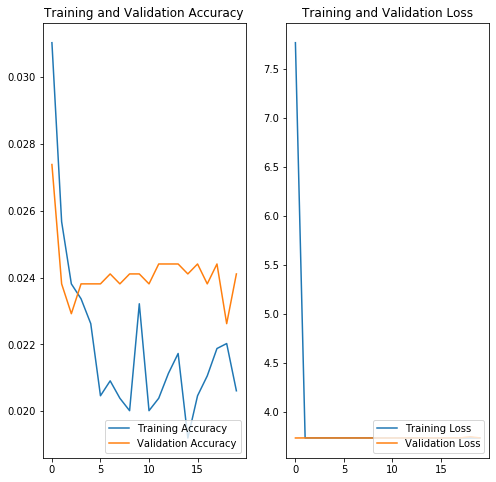

In [11]:
acc = history.history["accuracy"]
loss = history.history["loss"]
validation_acc = history.history["val_accuracy"]
validation_loss = history.history["val_loss"]

epochs_range = range(NUM_EPOCHS)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = "Training Accuracy")
plt.plot(epochs_range, validation_acc, label = "Validation Accuracy")
plt.legend(loc = "lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = "Training Loss")
plt.plot(epochs_range, validation_loss, label = "Validation Loss")
plt.legend(loc = "lower right")
plt.title("Training and Validation Loss")
plt.show()

In [12]:
model.save(MODEL_DIR + "{}.h5".format(model_id))